## Analyze Walkable TOD through 2016 Walk to School Day Registration Data

In [1]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px # create interactive codes

# to import open data
from sodapy import Socrata
import matplotlib.pyplot as plt

https://data.lacity.org/resource/cq4z-inke.json

In [2]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

#limit the results within 2000
results = client.get("cq4z-inke", limit=2000)

# Convert to pandas DataFrame
walktoschool = pd.DataFrame.from_records(results)

# print it with .sample, which gives you random rows
walktoschool.sample(2)

_                       school oct_event_date top_50_rank  \
78  49  El Dorado Avenue Elementary            1st         ---   
84  45         Esperanza Elementary            5th           2   

   expected_attendees board_district local_district city_council_district  \
78                200    (6) Ratliff      Northeast           Fuentes (7)   
84                300     (2) Garcia       Central            Cedillo (1)   

   banner banner_2          week_registered  \
78     No      ---  2016-09-12T00:00:00.000   
84     No      ---  2016-09-12T00:00:00.000   

                                           location_1  \
78  {'latitude': '34.301498', 'longitude': '-118.4...   
84  {'latitude': '34.055012', 'longitude': '-118.2...   

   :@computed_region_qz3q_ghft :@computed_region_k96s_3jcv  \
78                       18912                          51   
84                       23078                         561   

   :@computed_region_tatf_ua23 :@computed_region_ur2y_g4cx  \
78                         642                         NaN   
84                         836                         NaN   

   :@computed_region_kqwf_mjcx :@computed_region_2dna_qi2s  
78                           1                          47  
84                          11                          68

In [3]:
walktoschool = pd.DataFrame.from_records(results)

In [4]:
walktoschool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   _                            177 non-null    object
 1   school                       177 non-null    object
 2   oct_event_date               177 non-null    object
 3   top_50_rank                  177 non-null    object
 4   expected_attendees           177 non-null    object
 5   board_district               177 non-null    object
 6   local_district               177 non-null    object
 7   city_council_district        177 non-null    object
 8   banner                       177 non-null    object
 9   banner_2                     177 non-null    object
 10  week_registered              177 non-null    object
 11  location_1                   177 non-null    object
 12  :@computed_region_qz3q_ghft  175 non-null    object
 13  :@computed_region_k96s_3jcv  174 no

In [5]:
type(walktoschool)

pandas.core.frame.DataFrame

In [6]:
walktoschool.head()

_                                 school oct_event_date top_50_rank  \
0   46                 Canoga Park Elementary            5th         ---   
1  143  Sonia M. Sotomayor Learning Academies            5th         ---   
2  159        Grand View Boulevard Elementary            5th         ---   
3   75     Hubert Howe Bancroft Middle School            5th         ---   
4   24                Selma Avenue Elementary            5th           3   

  expected_attendees   board_district local_district city_council_district  \
0                750  (3) Schmerelson      Northwest       Blumenfield (3)   
1               1800    (5) Rodriguez        Central           Cedillo (1)   
2                650       (4) Zimmer           West            Bonin (11)   
3                100       (4) Zimmer           West               Ryu (4)   
4                 50       (4) Zimmer           West        O’Farrell (13)   

  banner banner_2          week_registered  \
0     No      ---  2016-09-12T00:00:00.000   
1     No      ---  2016-09-26T00:00:00.000   
2     No      ---  2016-09-26T00:00:00.000   
3     No      ---  2016-09-12T00:00:00.000   
4     No      ---  2016-09-05T00:00:00.000   

                                          location_1  \
0  {'human_address': '{"address": "7438 TOPANGA C...   
1  {'human_address': '{"address": "2050 SAN FERNA...   
2  {'latitude': '34.001914', 'longitude': '-118.4...   
3  {'latitude': '34.088009', 'longitude': '-118.3...   
4  {'latitude': '34.099722', 'longitude': '-118.3...   

  :@computed_region_qz3q_ghft :@computed_region_k96s_3jcv  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                       24031                         904   
3                       23669                         444   
4                       23446                         422   

  :@computed_region_tatf_ua23 :@computed_region_ur2y_g4cx  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                        1244                          10   
3                         869                         NaN   
4                         468                         NaN   

  :@computed_region_kqwf_mjcx :@computed_region_2dna_qi2s  
0                         NaN                         NaN  
1                         NaN                         NaN  
2                          10                          27  
3                           7                          34  
4                           8                          34

In [7]:
walktoschool['top_50_rank'].value_counts()

---    155
14       1
25       1
33       1
50       1
42       1
40       1
6        1
21       1
30       1
24       1
2        1
3        1
45       1
43       1
1        1
16       1
11       1
26       1
41       1
5        1
34       1
9        1
Name: top_50_rank, dtype: int64

In [8]:
walktoschool

_                                             school oct_event_date  \
0     46                             Canoga Park Elementary            5th   
1    143              Sonia M. Sotomayor Learning Academies            5th   
2    159                    Grand View Boulevard Elementary            5th   
3     75                 Hubert Howe Bancroft Middle School            5th   
4     24                            Selma Avenue Elementary            5th   
..   ...                                                ...            ...   
172   97                        Christopher Dena Elementary            5th   
173   83                         Lockwood Avenue Elementary            5th   
174  104                          Trinity Street Elementary            5th   
175  147                            Erwin Street Elementary            5th   
176   16  Volunteers of America Head Start/Early Head Start            5th   

    top_50_rank expected_attendees   board_district local_district  \
0           ---                750  (3) Schmerelson      Northwest   
1           ---               1800    (5) Rodriguez        Central   
2           ---                650       (4) Zimmer           West   
3           ---                100       (4) Zimmer           West   
4             3                 50       (4) Zimmer           West   
..          ...                ...              ...            ...   
172         ---                400       (2) Garcia          East    
173         ---                250    (5) Rodriguez        Central   
174         ---                350       (2) Garcia        Central   
175         ---                600  (3) Schmerelson      Northeast   
176         ---               2700              ---            ---   

    city_council_district banner banner_2          week_registered  \
0         Blumenfield (3)     No      ---  2016-09-12T00:00:00.000   
1             Cedillo (1)     No      ---  2016-09-26T00:00:00.000   
2              Bonin (11)     No      ---  2016-09-26T00:00:00.000   
3                 Ryu (4)     No      ---  2016-09-12T00:00:00.000   
4          O’Farrell (13)     No      ---  2016-09-05T00:00:00.000   
..                    ...    ...      ...                      ...   
172           Huizar (14)     No      ---  2016-09-19T00:00:00.000   
173        O’Farrell (13)     No      ---  2016-09-19T00:00:00.000   
174             Price (9)     No      ---  2016-09-19T00:00:00.000   
175         Krekorian (2)     No      ---  2016-09-26T00:00:00.000   
176                   ---     No      ---  2016-08-29T00:00:00.000   

                                            location_1  \
0    {'human_address': '{"address": "7438 TOPANGA C...   
1    {'human_address': '{"address": "2050 SAN FERNA...   
2    {'latitude': '34.001914', 'longitude': '-118.4...   
3    {'latitude': '34.088009', 'longitude': '-118.3...   
4    {'latitude': '34.099722', 'longitude': '-118.3...   
..                                                 ...   
172  {'latitude': '34.022375', 'longitude': '-118.2...   
173  {'latitude': '34.08871', 'longitude': '-118.28...   
174  {'latitude': '34.01218', 'longitude': '-118.26...   
175  {'latitude': '34.18304', 'longitude': '-118.42...   
176  {'latitude': '34.061725', 'longitude': '-118.3...   

    :@computed_region_qz3q_ghft :@computed_region_k96s_3jcv  \
0                           NaN                         NaN   
1                           NaN                         NaN   
2                         24031                         904   
3                         23669                         444   
4                         23446                         422   
..                          ...                         ...   
172                       23441                         529   
173                       23447                         435   
174                       22727                         714   
175                       19729                         186  

In [9]:
## delete the rank that has no value
walktoschool.drop(walktoschool.loc[walktoschool['top_50_rank']=='---'].index, inplace=True)
walktoschool.head()

_                      school oct_event_date top_50_rank  \
4   24     Selma Avenue Elementary            5th           3   
7   44   Harmony Elementary School            5th          34   
22  27       Berendo Middle School            5th           5   
23   7    Panorama City Elementary            5th          41   
25  58  Sheridan Street Elementary            5th          26   

   expected_attendees board_district local_district city_council_district  \
4                  50     (4) Zimmer           West        O’Farrell (13)   
7                 630  (5) Rodriguez       Central              Price (9)   
22                100  (5) Rodriguez       Central            Cedillo (1)   
23                500    (6) Ratliff      Northwest          Martinez (6)   
25                100     (2) Garcia          East            Huizar (14)   

   banner banner_2          week_registered  \
4      No      ---  2016-09-05T00:00:00.000   
7      No      ---  2016-09-12T00:00:00.000   
22     No      ---  2016-09-05T00:00:00.000   
23     No      ---  2016-08-22T00:00:00.000   
25     No      ---  2016-09-12T00:00:00.000   

                                           location_1  \
4   {'latitude': '34.099722', 'longitude': '-118.3...   
7   {'latitude': '34.007523', 'longitude': '-118.2...   
22  {'latitude': '34.049614', 'longitude': '-118.2...   
23  {'latitude': '34.226464', 'longitude': '-118.4...   
25  {'latitude': '34.048781', 'longitude': '-118.2...   

   :@computed_region_qz3q_ghft :@computed_region_k96s_3jcv  \
4                        23446                         422   
7                        22727                         713   
22                       22723                         620   
23                       19730                         148   
25                       23450                         512   

   :@computed_region_tatf_ua23 :@computed_region_ur2y_g4cx  \
4                          468                         NaN   
7                          664                           7   
22                        1356                         NaN   
23                         419                         NaN   
25                         509                         NaN   

   :@computed_region_kqwf_mjcx :@computed_region_2dna_qi2s  
4                            8                          34  
7                           13                         NaN  
22                          11                           8  
23                           3                          59  
25                           9                          38

In [10]:
# then convert the values in top_50_rank into numeric values
walktoschool['top_50_rank'] = pd.to_numeric(walktoschool['top_50_rank'])
walktoschool.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 4 to 171
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   _                            22 non-null     object
 1   school                       22 non-null     object
 2   oct_event_date               22 non-null     object
 3   top_50_rank                  22 non-null     int64 
 4   expected_attendees           22 non-null     object
 5   board_district               22 non-null     object
 6   local_district               22 non-null     object
 7   city_council_district        22 non-null     object
 8   banner                       22 non-null     object
 9   banner_2                     22 non-null     object
 10  week_registered              22 non-null     object
 11  location_1                   22 non-null     object
 12  :@computed_region_qz3q_ghft  22 non-null     object
 13  :@computed_region_k96s_3jcv  22 non-

In [11]:
# keep it simple with only 4 columns!
columns_to_keep = ['school','top_50_rank','location_1']
walktoschool = walktoschool[columns_to_keep]
walktoschool.sample(10)

school  top_50_rank  \
4          Selma Avenue Elementary            3   
159        Quincy Jones Elementary           33   
164  Westminster Avenue Elementary           25   
84            Esperanza Elementary            2   
23        Panorama City Elementary           41   
22           Berendo Middle School            5   
171   John H Liechty Middle School            9   
151         28th Street Elementary           42   
25      Sheridan Street Elementary           26   
7        Harmony Elementary School           34   

                                            location_1  
4    {'latitude': '34.099722', 'longitude': '-118.3...  
159  {'latitude': '34.014645', 'longitude': '-118.2...  
164  {'latitude': '33.992111', 'longitude': '-118.4...  
84   {'latitude': '34.055012', 'longitude': '-118.2...  
23   {'latitude': '34.226464', 'longitude': '-118.4...  
22   {'latitude': '34.049614', 'longitude': '-118.2...  
171  {'latitude': '34.055374', 'longitude': '-118.2...  
151  {'latitude': '34.01922', 'longitude': '-118.26...  
25   {'latitude': '34.048781', 'longitude': '-118.2...  
7    {'latitude': '34.007523', 'longitude': '-118.2...

In [12]:
## sorting the data by descending
walktoschool=walktoschool.sort_values(by='top_50_rank', ascending=False)
walktoschool

school  top_50_rank  \
157                     112th Street Elementary           50   
74                            Ramona Elementary           45   
66                Lafayette Park Primary Center           43   
151                      28th Street Elementary           42   
23                     Panorama City Elementary           41   
133                  Lake Street Primary School           40   
7                     Harmony Elementary School           34   
159                     Quincy Jones Elementary           33   
112                           Aurora Elementary           30   
25                   Sheridan Street Elementary           26   
164               Westminster Avenue Elementary           25   
105  Gratts Learning Academy for Young Scholars           24   
113                   Dayton Heights Elementary           21   
30                       10th Street Elementary           16   
86              Charles White Elementary School           14   
29                        Leo Politi Elementary           11   
171                John H Liechty Middle School            9   
130                 Hobart Boulevard Elementary            6   
22                        Berendo Middle School            5   
4                       Selma Avenue Elementary            3   
84                         Esperanza Elementary            2   
41                        Hollywood Senior High            1   

                                            location_1  
157  {'latitude': '33.933133', 'longitude': '-118.2...  
74   {'latitude': '34.091568', 'longitude': '-118.2...  
66   {'latitude': '34.066705', 'longitude': '-118.2...  
151  {'latitude': '34.01922', 'longitude': '-118.26...  
23   {'latitude': '34.226464', 'longitude': '-118.4...  
133  {'latitude': '34.067957', 'longitude': '-118.2...  
7    {'latitude': '34.007523', 'longitude': '-118.2...  
159  {'latitude': '34.014645', 'longitude': '-118.2...  
112  {'latitude': '33.995044', 'longitude': '-118.2...  
25   {'latitude': '34.048781', 'longitude': '-118.2...  
164  {'latitude': '33.992111', 'longitude': '-118.4...  
105  {'latitude': '34.057929', 'longitude': '-118.2...  
113  {'latitude': '34.082406', 'longitude': '-118.2...  
30   {'latitude': '34.048227', 'longitude': '-118.2...  
86   {'latitude': '34.059793', 'longitude': '-118.2...  
29   {'latitude': '34.05079', 'longitude': '-118.28...  
171  {'latitude': '34.055374', 'longitude': '-118.2...  
130  {'latitude': '34.053135', 'longitude': '-118.3...  
22   {'latitude': '34.049614', 'longitude': '-118.2...  
4    {'latitude': '34.099722', 'longitude': '-118.3...  
84   {'latitude': '34.055012', 'longitude': '-118.2...  
41   {'latitude': '34.099203', 'longitude': '-118.3...

## Now let's fix the latitude and longitude

We see in our previous data that latitude and longitude are combined in one single column, so we are going to seperate them by using the split and append function.

In [19]:
import numpy as np
lat = []
lon = []

# For each row in a varible,
for row in walktoschool["location_1"]:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
walktoschool['latitude'] = lat
walktoschool['longitude'] = lon

In [20]:
walktoschool

school  top_50_rank  \
157                     112th Street Elementary           50   
74                            Ramona Elementary           45   
66                Lafayette Park Primary Center           43   
151                      28th Street Elementary           42   
23                     Panorama City Elementary           41   
133                  Lake Street Primary School           40   
7                     Harmony Elementary School           34   
159                     Quincy Jones Elementary           33   
112                           Aurora Elementary           30   
25                   Sheridan Street Elementary           26   
164               Westminster Avenue Elementary           25   
105  Gratts Learning Academy for Young Scholars           24   
113                   Dayton Heights Elementary           21   
30                       10th Street Elementary           16   
86              Charles White Elementary School           14   
29                        Leo Politi Elementary           11   
171                John H Liechty Middle School            9   
130                 Hobart Boulevard Elementary            6   
22                        Berendo Middle School            5   
4                       Selma Avenue Elementary            3   
84                         Esperanza Elementary            2   
41                        Hollywood Senior High            1   

                                            location_1  \
157  {'latitude': '33.933133', 'longitude': '-118.2...   
74   {'latitude': '34.091568', 'longitude': '-118.2...   
66   {'latitude': '34.066705', 'longitude': '-118.2...   
151  {'latitude': '34.01922', 'longitude': '-118.26...   
23   {'latitude': '34.226464', 'longitude': '-118.4...   
133  {'latitude': '34.067957', 'longitude': '-118.2...   
7    {'latitude': '34.007523', 'longitude': '-118.2...   
159  {'latitude': '34.014645', 'longitude': '-118.2...   
112  {'latitude': '33.995044', 'longitude': '-118.2...   
25   {'latitude': '34.048781', 'longitude': '-118.2...   
164  {'latitude': '33.992111', 'longitude': '-118.4...   
105  {'latitude': '34.057929', 'longitude': '-118.2...   
113  {'latitude': '34.082406', 'longitude': '-118.2...   
30   {'latitude': '34.048227', 'longitude': '-118.2...   
86   {'latitude': '34.059793', 'longitude': '-118.2...   
29   {'latitude': '34.05079', 'longitude': '-118.28...   
171  {'latitude': '34.055374', 'longitude': '-118.2...   
130  {'latitude': '34.053135', 'longitude': '-118.3...   
22   {'latitude': '34.049614', 'longitude': '-118.2...   
4    {'latitude': '34.099722', 'longitude': '-118.3...   
84   {'latitude': '34.055012', 'longitude': '-118.2...   
41   {'latitude': '34.099203', 'longitude': '-118.3...   

                    lat_label                         lat  \
157  {'latitude': '33.933133'  'longitude': '-118.252731'   
74   {'latitude': '34.091568'  'longitude': '-118.299412'   
66   {'latitude': '34.066705'  'longitude': '-118.280839'   
151   {'latitude': '34.01922'  'longitude': '-118.260482'   
23   {'latitude': '34.226464'  'longitude': '-118.457469'   
133  {'latitude': '34.067957'   'longitude': '-118.27079'   
7    {'latitude': '34.007523'   'longitude': '-118.25984'   
159  {'latitude': '34.014645'  'longitude': '-118.260843'   
112  {'latitude': '33.995044'   'longitude': '-118.25711'   
25   {'latitude': '34.048781'  'longitude': '-118.209001'   
164  {'latitude': '33.992111'  'longitude': '-118.472071'   
105  {'latitude': '34.057929'  'longitude': '-118.261863'   
113  {'latitude': '34.082406'  'longitude': '-118.288013'   
30   {'latitude': '34.048227'  'longitude': '-118.273645'   
86   {'latitude': '34.059793'  'longitude': '-118.279869'   
29    {'latitude': '34.05079'  'longitude': '-118.287371'   
171  {'latitude': '34.055374'  'longitude': '-118.270151'   
130  {'latitude': '34.053135'  'longitude': '-118.305211'   
22   {'latitude': '34.049614'  'longitude': '-118.293699'   
4    {'latitu

We see that lat and long are seperated, but the values all have words in them.

In [21]:
# use str,replace function to leave out the words like latitude and longitude
walktoschool['latitude'] = walktoschool['latitude'].str.replace(r'\D', '',regex=None).astype('int')
walktoschool['latitude']

/tmp/ipykernel_360/3782465097.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  walktoschool['latitude'] = walktoschool['latitude'].str.replace(r'\D', '',regex=None).astype('int')


157    33933133
74     34091568
66     34066705
151     3401922
23     34226464
133    34067957
7      34007523
159    34014645
112    33995044
25     34048781
164    33992111
105    34057929
113    34082406
30     34048227
86     34059793
29      3405079
171    34055374
130    34053135
22     34049614
4      34099722
84     34055012
41     34099203
Name: latitude, dtype: int64

In [22]:
# the correct lat is not 34000000, so I manually divide all of them by 1000000
walktoschool['latitude']=walktoschool['latitude']/1000000
walktoschool['latitude']

157    33.933133
74     34.091568
66     34.066705
151     3.401922
23     34.226464
133    34.067957
7      34.007523
159    34.014645
112    33.995044
25     34.048781
164    33.992111
105    34.057929
113    34.082406
30     34.048227
86     34.059793
29      3.405079
171    34.055374
130    34.053135
22     34.049614
4      34.099722
84     34.055012
41     34.099203
Name: latitude, dtype: float64

In [23]:
# same thing with longitude
walktoschool['longitude'] = walktoschool['longitude'].str.replace(r'\D', '',regex=None).astype('int')
walktoschool['longitude']

/tmp/ipykernel_360/833092142.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  walktoschool['longitude'] = walktoschool['longitude'].str.replace(r'\D', '',regex=None).astype('int')


157    118252731
74     118299412
66     118280839
151    118260482
23     118457469
133     11827079
7       11825984
159    118260843
112     11825711
25     118209001
164    118472071
105    118261863
113    118288013
30     118273645
86     118279869
29     118287371
171    118270151
130    118305211
22     118293699
4      118334629
84     118272628
41     118338684
Name: longitude, dtype: int64

In [24]:
walktoschool['longitude'] = walktoschool['longitude']/(-1000000)
walktoschool['longitude']

157   -118.252731
74    -118.299412
66    -118.280839
151   -118.260482
23    -118.457469
133    -11.827079
7      -11.825984
159   -118.260843
112    -11.825711
25    -118.209001
164   -118.472071
105   -118.261863
113   -118.288013
30    -118.273645
86    -118.279869
29    -118.287371
171   -118.270151
130   -118.305211
22    -118.293699
4     -118.334629
84    -118.272628
41    -118.338684
Name: longitude, dtype: float64

In [25]:
# dropping values that don't match the rest of the numbers
walktoschool.drop(walktoschool.loc[walktoschool['latitude']< 33].index, inplace=True)
walktoschool[walktoschool.latitude <33]

Empty DataFrame
Columns: [school, top_50_rank, location_1, lat_label, lat, lon_label, lon, latitude, longitude]
Index: []

In [26]:
walktoschool.drop(walktoschool.loc[walktoschool['longitude']>-118].index, inplace=True)

In [27]:
walktoschool_mini = walktoschool[['school','top_50_rank','latitude','longitude']].copy()
walktoschool_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 157 to 41
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       17 non-null     object 
 1   top_50_rank  17 non-null     int64  
 2   latitude     17 non-null     float64
 3   longitude    17 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 680.0+ bytes


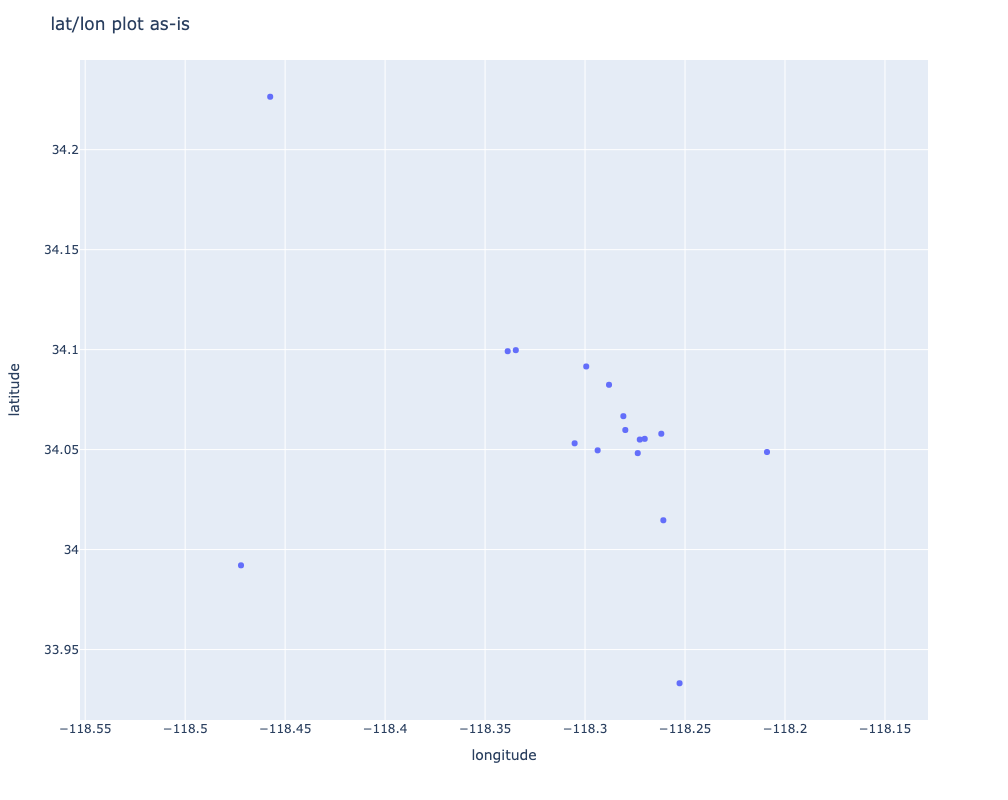

In [28]:
# plot it
fig = px.scatter(walktoschool_mini,
           x='longitude',
           y='latitude'
)

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "lat/lon plot as-is"
)

# make it a square grid
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()

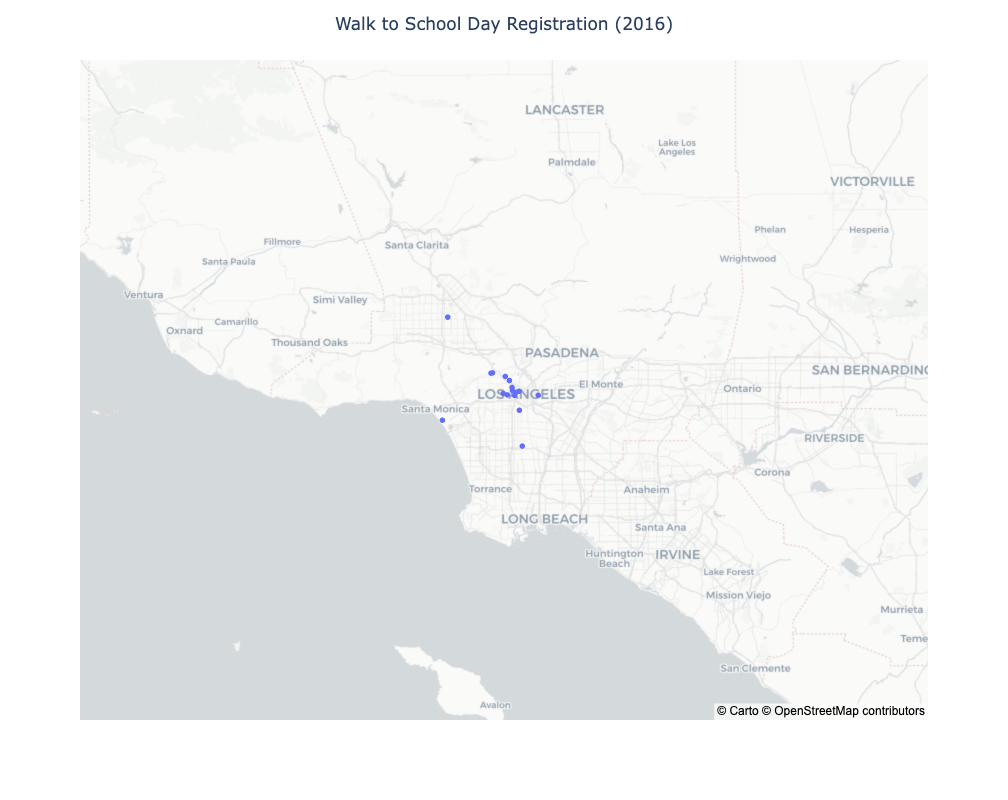

In [29]:
fig = px.scatter_mapbox(walktoschool_mini,
                        lat='latitude',
                        lon='longitude',
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Walk to School Day Registration (2016)",
    title_x=0.5 # aligns title to center
)

fig.show()

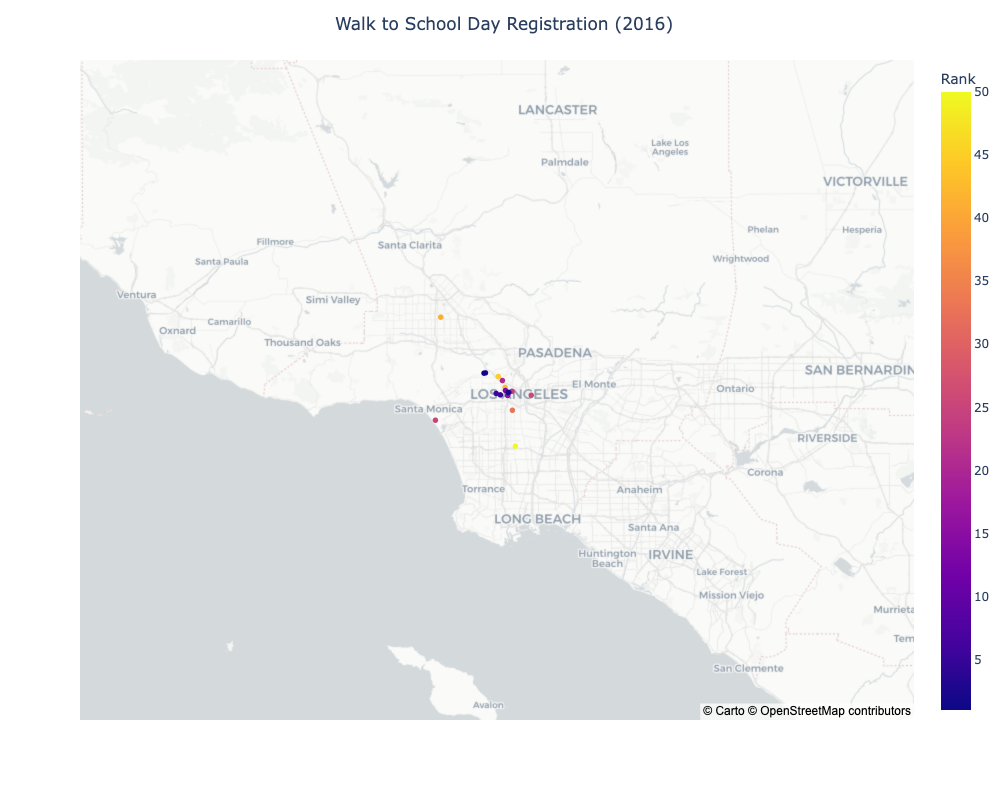

In [30]:
#  add some color coding!
fig = px.scatter_mapbox(walktoschool_mini,
                        lat='latitude',
                        lon='longitude',
                        color="top_50_rank",
                        labels={'top_50_rank':'Rank'},
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Walk to School Day Registration (2016)",
    title_x=0.5 # aligns title to center
)

fig.show()

Now we see that there is at least one top 50 ranked school nearby the TOD.